<h1>Geometric Transformations of Images</h1>

<h2> Load opencv, numpy and plot modules </h2>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h2>Read sample image</h2>

In [2]:
img = cv2.imread("./examples/lane_detection_1.jpg")

*By default OpenCV load image in BGR format.

In [3]:

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

<h2>Scaling</h2>

In [4]:
res = cv2.resize(img_rgb, None,fx=2, fy=2, interpolation = cv2.INTER_LINEAR)

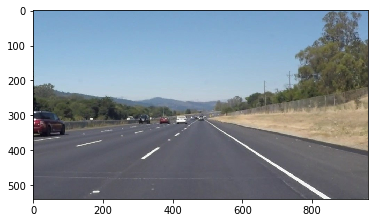

In [5]:
plt.imshow(img_rgb)
plt.show();

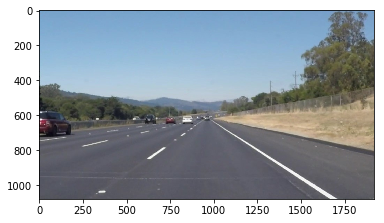

In [6]:
plt.imshow(res)
plt.show();

<h2>Rotation</h2>

Calculate transformation matrix using function <b>cv2.getRotationMatrix2D</b>

In [7]:
rows,cols,ch_num = img_rgb.shape
M = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1)

Apply transformation matrix with rotation

In [8]:
rot = cv2.warpAffine(img_rgb, M, (cols,rows))

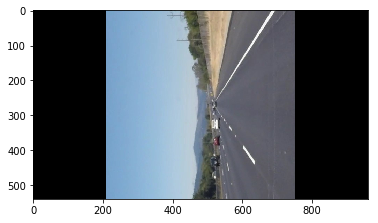

In [9]:
plt.imshow(rot)
plt.show();

<h2>Translation</h2>

Create transformation matrix with translation in X direction 200 and in Y direction 100

In [10]:
M = np.float32([[1,0,200], [0,1,100]])

Apply transformation matrix with translation

In [11]:
tr = cv2.warpAffine(img_rgb, M, (cols,rows))

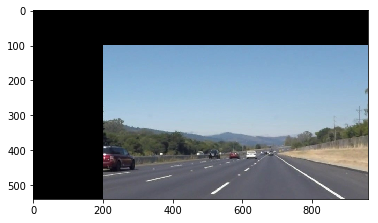

In [12]:
plt.imshow(tr)
plt.show();

<h2>Skew</h2>

Create transformation matrix with skew

In [13]:
M = np.float32([[1,1,1], [0,1,1]])

Apply transformation matrix with translation

In [14]:
sk = cv2.warpAffine(img_rgb, M, (cols,rows))

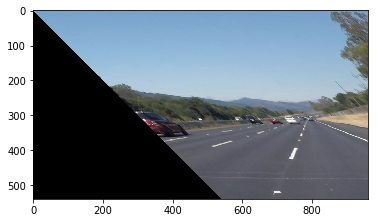

In [15]:
plt.imshow(sk)
plt.show();